# Potential uses cases or ideas of analysis:

- Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.

- Building a ML model that predicts Total number of streams on Spotify with the variables we have in the dataset

- NLP of most popular songs (getting lyrics with web scraping?) - We could create new features based on the lyrics of those songs, and then rerun our Model including those new features.

- Artist impact: Analyze how artist involvement and attributes relate to a song's success.

- Temporal trends: Identify any shifts in music attributes and preferences over time.

- Cross-platform presence: Investigate how songs perform across different streaming services

- Idea: we could create a dd/mm/yyyy column with the released d


# Importing Libraries

### conda install plotly

In [2]:
#basic Libraries
import numpy as np
import pandas as pd
# import warnings
import scipy

#Data Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

#Libraries set up
# warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 10)
# plt.style.use('seaborn')
plt.style.use("seaborn-v0_8")


# 1. Loading the dataset

In [3]:
df = pd.read_csv("./data/spotify_2023_hits.csv", encoding='ISO-8859-1')

#got an error (UnicodeDecodeError: "utf-8") when loading the dataset for the 1st time. 
#The UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error 
#is a common error that occurs when trying to read a file with Pandas that contains non-UTF-8 encoded characters. 
#UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there. 
#If you try to read a file with a different encoding format, you may encounter this error.


# 2. Initial exploration

In [4]:
df.head()


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [5]:
df.shape


(952, 24)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [4]:
df.describe()


artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000  1.416362e+08   
50%             2216.500000           3.000000  2.905309e+08   
75%             5573.750000          16.000000  6.738690e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          952.000000       952.000000        952.000000  952.000000   
mean            67.866597        51.963235          2.669118  122.553571   
std             86.470591        50.628850          6.038152   28.069601   
min              0.000000         0.000000          0.000000   65.000000   
25%             13.000000         7.000000          0.000000   99.750000   
50%             34.000000        38.500000          0.000000  121.000000   
75%             88.000000        87.000000          2.000000  140.250000   
max            672.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      952.000000  952.000000  952.000000      952.000000   
mean        66.984244   51.406513   64.274160       27.078782   
std         14.631282   23.480526   16.558517       26.001599   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       18.000000   
75%         78.000000   70.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

In [124]:
duplicated_artists_bool = df['artist(s)_name'].duplicated()
duplicated_artists = df.loc[duplicated_artists_bool, ['artist(s)_name']]
duplicated_artists.groupby('artist(s)_name').count()


Empty DataFrame
Columns: []
Index: [(G)I-DLE, Adele, Arctic Monkeys, Ariana Grande, Ariana Grande, The Weeknd, Avicii, BLACKPINK, BTS, Bad Bunny, Bad Bunny, Jhay Cortez, BeyoncÃ¯Â¿, Billie Eilish, Bruno Mars, Bruno Mars, Anderson .Paak, Silk Sonic, Burna Boy, Central Cee, Charlie Puth, Coldplay, Daddy Yankee, Daddy Yankee, Bad Bunny, David Kushner, Doja Cat, Dr. Dre, Snoop Dogg, Drake, Drake, 21 Savage, Dua Lipa, Duki, ENHYPEN, Ed Sheeran, Eminem, Eminem, Dr. Dre, Feid, Fifty Fifty, Frank Ocean, Fuerza Regida, Future, Harry Styles, Hotel Ugly, IVE, Imagine Dragons, JVKE, Jack Harlow, James Arthur, Jasiel NuÃ¯Â¿Â½Ã¯Â¿Â½ez, Peso P, Jimin, Joji, Juice WRLD, Jung Kook, Junior H, Peso Pluma, Justin Bieber, Kanye West, Karol G, Kendrick Lamar, LE SSERAFIM, Labrinth, Lady Gaga, Lana Del Rey, Lewis Capaldi, Lil Baby, Lil Nas X, Linkin Park, Lizzo, Mambo Kingz, DJ Luian, Anuel Aa, Michael BublÃ¯Â¿, Miley Cyrus, Morgan Wallen, MÃ¯Â¿Â½Ã¯Â¿Â½ne, Nat King Cole, NewJeans, Nicki Minaj, Nicki Minaj, Lil Baby, Nirvana, Olivia Rodrigo, OneRepublic, Paulo Londra, Peso Pluma, Post Malone, Quevedo, RAYE, 070 Shake, ROSALÃ¯Â¿Â½, Rauw Alejandro, Rauw Alejandro, Bizarrap, Rosa Linn, Ryan Castro, SZA, Sebastian Yatra, Shawn Mendes, Sia, Steve Lacy, Stray Kids, TWICE, Tate McRae, Taylor Swift, The Kid Laroi, The Neighbourhood, The Weeknd, The Weeknd, Gesaffelstein, ThxSoMch, Troye Sivan, Tyler, The Creator, ...]

[104 rows x 0 columns]

In [4]:
df['artist(s)_name'].unique()


array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas', 'Bad Bunny, Grupo Frontera', 'NewJeans',
       'Miley Cyrus', 'David Kushner', 'Harry Styles', 'SZA',
       'Fifty Fifty', 'Billie Eilish', 'Feid, Young Miko', 'Jimin',
       'Gabito Ballesteros, Junior H, Peso Pluma', 'Arctic Monkeys',
       'Bizarrap, Peso Pluma', 'The Weeknd, Madonna, Playboi Carti',
       'Fuerza Regida', 'RÃ¯Â¿Â½Ã¯Â¿Â½ma, Selena G', 'Tainy, Bad Bunny',
       'Morgan Wallen', 'Dua Lipa', 'Troye Sivan',
       'Peso Pluma, Grupo Frontera',
       'The Weeknd, 21 Savage, Metro Boomin', 'Karol G, Shakira',
       'Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk',
       'Yahritza Y Su Esencia, Grupo Frontera', 'Junior H, Peso Pluma',
       'Post Malone, Swae Lee', 'Bebe Rexha, David Guetta',
       'Tyler, The Creator, Kali Uchis'

# 2.1 exploration of columns

## 0   track_name            952 non-null    object 

TODO:
- clean up and normalize object/str
- look for covers
- look if this is cover
- collect tracks by id using music DB APIs (Genius for ex.)
- analyze the words in the track name
- get the lyrics

### Python library https://github.com/johnwmillr/LyricsGenius
https://pypi.org/project/lyricsgenius/
https://lyricsgenius.readthedocs.io/en/master/

In [5]:
import typing as ty
import collections as coll
import random # import randint
import time
import asyncio

import lyricsgenius as lyr


In [7]:
# import lyricsgenius as lyr
# import asyncio


In [6]:
songs = df['track_name']
songs


0      Seven (feat. Latto) (Explicit Ver.)
1                                     LALA
2                                  vampire
3                             Cruel Summer
4                           WHERE SHE GOES
                      ...                 
947                           My Mind & Me
948              Bigger Than The Whole Sky
949                   A Veces (feat. Feid)
950                          En La De Ella
951                                  Alone
Name: track_name, Length: 952, dtype: object

In [7]:
artists = df['artist(s)_name']
artists


0        Latto, Jung Kook
1             Myke Towers
2          Olivia Rodrigo
3            Taylor Swift
4               Bad Bunny
              ...        
947          Selena Gomez
948          Taylor Swift
949    Feid, Paulo Londra
950    Feid, Sech, Jhayco
951             Burna Boy
Name: artist(s)_name, Length: 952, dtype: object

In [8]:
len(artists)


952

In [9]:
artist_count = df['artist_count']
artist_count


0      2
1      1
2      1
3      1
4      1
      ..
947    1
948    1
949    2
950    3
951    1
Name: artist_count, Length: 952, dtype: int64

### Lyrics attempt

In [ ]:
# # Example
# ARTISTS_SEP = ','
# # lyrics: ty.DefaultDict[int, tuple[str, str]]
# lyrics =  coll.defaultdict(coll.defaultdict)


# for aidx in range(len(artists)):
#     # print (artists[aidx])
#     if artist_count[aidx] == 1:
#         # lyrics = {aidx: f"{aidx}: {artists[aidx].strip()}"}
#         lyrics[aidx] = {f"{artists[aidx]}": f"lyrics for by {artists[aidx]}" }

#     else:
#         artists_feat = [a.strip() for a in artists[aidx].split(ARTISTS_SEP)]
#         # print(artists_feat)
#         for feat_artist in artists_feat:
#             # print(feat_artist)
#             lyrics[aidx][feat_artist]= {f"{feat_artist}": f"lyrics for by {feat_artist}" } # [feat_artist] = f"lyrics for by {feat_artist}" 

# lyrics



In [10]:
import typing as ty
import collections as coll
import random # import randint
import time
import asyncio
import re

import lyricsgenius as lyr


In [11]:
# configure Genius lyrics API
PRIVATE_ACCESS_TOKEN='WS6RBBnBOHXGNqvPgQLhxtlRFdJoFbrcYjP7WOO8wqhA9lZHtS-ikjjOBW5rqjiA'
access_token = f"{PRIVATE_ACCESS_TOKEN}"
genius = lyr.Genius(access_token=access_token, sleep_time=0.3)
genius.PUBLIC_API_ROOT


'https://genius.com/api/'

In [12]:
# Configure Genius properties
genius.remove_section_headers = True
genius.skip_non_songs = True
genius.response_format = 'plain'
# https://lyricsgenius.readthedocs.io/en/master/reference/genius.html
# https://github.com/johnwmillr/LyricsGenius/issues/121
genius.timeout = 60 # sec
song_test = genius.search_song(title= songs[3], artist= artists[3] )
song_test.lyrics
# song_00 = genius.search_songs(search_term=songs[0], per_page=1)      song_00['hits'][0]['id']


Searching for "Cruel Summer" by Taylor Swift...


Done.


'203 ContributorsTranslationsTürkçeEspañolСрпскиPortuguêsPolskiItalianoMagyarDeutschFrançaisفارسی中文РусскийالعربيةУкраїнськаSvenskaCruel Summer Lyrics\n(Yeah, yeah, yeah, yeah)\n\nFever dream high in the quiet of the night\nYou know that I caught it (Oh yeah, you\'re right, I want it)\nBad, bad boy, shiny toy with a price\nYou know that I bought it (Oh yeah, you\'re right, I want it)\n\nKilling me slow, out the window\nI\'m always waiting for you to be waiting below\nDevils roll the dice, angels roll their eyes\nWhat doesn\'t kill me makes me want you more\n\nAnd it\'s new, the shape of your body\nIt\'s blue, the feeling I\'ve got\nAnd it\'s ooh, woah-oh\nIt\'s a cruel summer\nIt\'s cool, that\'s what I tell \'em\nNo rules in breakable heaven\nBut ooh, woah-oh\nIt\'s a cruel summer with you\n\nHang your head low in the glow of the vending machine\nI\'m not dying (Oh yeah, you\'re right, I want it)\nWe say that we\'ll just screw it up in these trying times\nWe\'re not trying (Oh yeah, yo

In [21]:
# # Genius API config

# genius.remove_section_headers = True
# genius.skip_non_songs = True
# genius.response_format = 'plain'
# genius


In [13]:
async def lyr_search(title: str, artist: str, sleep_time = 0.3) -> ty.Any:
    genius.sleep_time = sleep_time
    song = genius.search_song(title= title, artist= artist )
    return song


In [14]:
(1.0 / random.randint(1, 10))


0.3333333333333333

In [15]:
artists_idx_range =list( range(len(artists)))
random.shuffle(artists_idx_range)
artists_idx_range


[425,
 420,
 929,
 106,
 95,
 703,
 329,
 737,
 454,
 407,
 905,
 253,
 635,
 370,
 301,
 608,
 614,
 56,
 153,
 644,
 240,
 271,
 510,
 667,
 499,
 692,
 255,
 451,
 410,
 418,
 304,
 659,
 57,
 908,
 231,
 71,
 98,
 355,
 921,
 334,
 545,
 251,
 815,
 441,
 781,
 777,
 857,
 769,
 774,
 183,
 611,
 941,
 242,
 422,
 465,
 691,
 356,
 848,
 544,
 109,
 704,
 468,
 128,
 129,
 730,
 686,
 59,
 873,
 907,
 450,
 936,
 570,
 760,
 463,
 913,
 546,
 16,
 110,
 922,
 405,
 493,
 28,
 320,
 826,
 494,
 738,
 173,
 780,
 161,
 566,
 102,
 724,
 485,
 78,
 609,
 209,
 132,
 50,
 178,
 340,
 879,
 551,
 165,
 347,
 453,
 316,
 564,
 298,
 858,
 558,
 164,
 816,
 239,
 697,
 500,
 637,
 243,
 522,
 437,
 624,
 717,
 653,
 901,
 487,
 90,
 514,
 714,
 48,
 818,
 270,
 172,
 579,
 351,
 894,
 657,
 319,
 920,
 381,
 502,
 27,
 658,
 197,
 246,
 588,
 294,
 887,
 559,
 843,
 650,
 22,
 134,
 903,
 791,
 474,
 130,
 158,
 19,
 593,
 871,
 747,
 552,
 789,
 145,
 373,
 531,
 633,
 396,
 516,
 839,
 

In [16]:
def lyrics_extract(song_lyrics: str) -> tuple[str, bool]:
    SONG_LYRICS_BEGINS_AT = 'Lyrics\n'
    SONG_LYRICS_ENDS_AT = 'Embed'

    song_lyrics_idx_begin = song_lyrics.find(SONG_LYRICS_BEGINS_AT)
    print (song_lyrics_idx_begin)
    is_extractable_at_begin = (song_lyrics_idx_begin != -1)
    if is_extractable_at_begin: song_lyrics = song_lyrics[song_lyrics_idx_begin + len(SONG_LYRICS_BEGINS_AT):]


    song_lyrics_idx_end = song_lyrics.rfind(SONG_LYRICS_ENDS_AT)
    print(song_lyrics_idx_end)
    is_extractable_at_end = (song_lyrics_idx_end != -1)    
    if is_extractable_at_end: song_lyrics = song_lyrics[:song_lyrics_idx_end]

    return (song_lyrics, (is_extractable_at_begin or is_extractable_at_end))


# RegExp based
# beging_regex = re.compile()
def lyrics_extract_regex(song_lyrics: str) -> tuple[str, bool]:
    SONG_LYRICS_BEGINS_AT = r"Lyrics\n{0,5}"
    SONG_LYRICS_ENDS_AT = r"\d{0,5}Embed$"

    lyr_begin = re.search(pattern=SONG_LYRICS_BEGINS_AT, string=song_lyrics)
    print(lyr_begin.span())
    song_lyrics_idx_begin = lyr_begin.end()
    print(lyr_begin)
    is_extractable_at_begin = (song_lyrics_idx_begin != -1)
    if is_extractable_at_begin: song_lyrics = song_lyrics[song_lyrics_idx_begin:]

    lyr_end = re.search(pattern=SONG_LYRICS_ENDS_AT, string=song_lyrics)
    print(lyr_end.span())
    song_lyrics_idx_end = lyr_end.start()
    print(lyr_end)
    is_extractable_at_end = (song_lyrics_idx_end != -1)    
    if is_extractable_at_end: song_lyrics = song_lyrics[:song_lyrics_idx_end]

    return (song_lyrics, (is_extractable_at_begin or is_extractable_at_end ), song_lyrics_idx_begin, song_lyrics_idx_end)


In [17]:
test_lyr = 'Lyrics\n\u200buoy evol I, sdrow rehto nI\n\u200buoy evol I, sdrow rehto nI\n\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on a private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nI do know my man, but I don\'t trust him\nTrust that, Ps in the trap, disgustin\'\nStick with the stick, PVA, PDA, kiss that in public\nSouth London where I made my\nSouth London\'s where I made my first hundred\nElastic bands, plastic bags, two and a blue like cheese and onion\nIn Jamaica, quick vacation, travellin\' my pastimе\n\'Nough pollution in the ends, I flew back yard cah I wanna see starlight\nEritrеan, skin tone cinnamon, I think I found my princess\nMy empress, still gonna impress\nI know \'dem man talk on the kid, but\nSee Dave LiveGet tickets as low as $81You might also like\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on the private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nAny girl that I\'m datin\' knows, bags that I buy come filled with fifties\nShe a ten out of ten on a bad day, public affection, I tell her, "Come kiss me"\nI like mine obsessed, clingy\nIf she don\'t miss me, miss me\nIf she don\'t miss me, history\nIf she don\'t miss me, it\'s a mystery\nG17 in the party, tipsy\nDon\'t drink, that\'s risky\nFocus, shells gonna land like Disney\nI\'ll put him down under, Sydney\nThat\'s bae, I\'ll donate both my kidneys\nTrue love, what the kid needs\nAnd a girl from the Westest Indies\nI know them man talk on the kid but\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on the private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nIn this world that I\'m in\nHow you wanna take pics with the belts in the ring\nBut don\'t help in the gym?\n\'Nough girls datin\' their biggest haters\nHow her boyfriend don\'t want her to win? Like, rah\nAnd why my girlfriend never wanna see me have a good time out if she ain\'t there?\nYeah, yeah (Fly— Fly me to the moon)\nFly me to the moon, let me get some space\nSeein\' them stars on her private story\nI dust that chick, she got no grace\n(Let me see what spring is like on Jupiter)\nSee her ex man, she got no taste, hip dip, she got no waist\nBody snatched, servin\' face (In other words, hold my hand)\nHaha, hold my hand, personal trainer\nFrequent flyer, bad, she toned and tan\nFree my gang, 013\'s and 020\'s (Darlin\' miss me)\nOh God knows, I miss my bros\nI just got a call from jail on the phone and that might\nFill my heart with song\nAnd let me sing forevermore\nYou are all I long for\nAll I worship and adore\nIn other words, please be true\nIn other words, I love you\nIn other words, I love you33Embed'

test_lyr_extr, is_extr = lyrics_extract(test_lyr)
test_lyr_extr, is_extr


0
2960


('\u200buoy evol I, sdrow rehto nI\n\u200buoy evol I, sdrow rehto nI\n\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on a private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nI do know my man, but I don\'t trust him\nTrust that, Ps in the trap, disgustin\'\nStick with the stick, PVA, PDA, kiss that in public\nSouth London where I made my\nSouth London\'s where I made my first hundred\nElastic bands, plastic bags, two and a blue like cheese and onion\nIn Jamaica, quick vacation, travellin\' my pastimе\n\'Nough pollution in the ends, I flew back yard cah I wanna see starlight\nEritrеan, skin tone cinnamon, I think I found my princess\nMy empress, still gonna impress\nI know \'dem man talk on the kid, but\nSee Dave LiveGet tickets as low as $81You might also like\nIt\'s hard to hate on the truth I\'m livin\' in\n\'No

In [18]:
test_lyr = 'Lyrics\n\u200buoy evol I, sdrow rehto nI\n\u200buoy evol I, sdrow rehto nI\n\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on a private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nI do know my man, but I don\'t trust him\nTrust that, Ps in the trap, disgustin\'\nStick with the stick, PVA, PDA, kiss that in public\nSouth London where I made my\nSouth London\'s where I made my first hundred\nElastic bands, plastic bags, two and a blue like cheese and onion\nIn Jamaica, quick vacation, travellin\' my pastimе\n\'Nough pollution in the ends, I flew back yard cah I wanna see starlight\nEritrеan, skin tone cinnamon, I think I found my princess\nMy empress, still gonna impress\nI know \'dem man talk on the kid, but\nSee Dave LiveGet tickets as low as $81You might also like\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on the private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nAny girl that I\'m datin\' knows, bags that I buy come filled with fifties\nShe a ten out of ten on a bad day, public affection, I tell her, "Come kiss me"\nI like mine obsessed, clingy\nIf she don\'t miss me, miss me\nIf she don\'t miss me, history\nIf she don\'t miss me, it\'s a mystery\nG17 in the party, tipsy\nDon\'t drink, that\'s risky\nFocus, shells gonna land like Disney\nI\'ll put him down under, Sydney\nThat\'s bae, I\'ll donate both my kidneys\nTrue love, what the kid needs\nAnd a girl from the Westest Indies\nI know them man talk on the kid but\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on the private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nIn this world that I\'m in\nHow you wanna take pics with the belts in the ring\nBut don\'t help in the gym?\n\'Nough girls datin\' their biggest haters\nHow her boyfriend don\'t want her to win? Like, rah\nAnd why my girlfriend never wanna see me have a good time out if she ain\'t there?\nYeah, yeah (Fly— Fly me to the moon)\nFly me to the moon, let me get some space\nSeein\' them stars on her private story\nI dust that chick, she got no grace\n(Let me see what spring is like on Jupiter)\nSee her ex man, she got no taste, hip dip, she got no waist\nBody snatched, servin\' face (In other words, hold my hand)\nHaha, hold my hand, personal trainer\nFrequent flyer, bad, she toned and tan\nFree my gang, 013\'s and 020\'s (Darlin\' miss me)\nOh God knows, I miss my bros\nI just got a call from jail on the phone and that might\nFill my heart with song\nAnd let me sing forevermore\nYou are all I long for\nAll I worship and adore\nIn other words, please be true\nIn other words, I love you\nIn other words, I love you33Embed'

test_lyr_extr, is_extr,  ok, pos = lyrics_extract_regex(test_lyr)
test_lyr_extr, is_extr, ok, pos


(0, 7)
<re.Match object; span=(0, 7), match='Lyrics\n'>
(2958, 2965)
<re.Match object; span=(2958, 2965), match='33Embed'>


('\u200buoy evol I, sdrow rehto nI\n\u200buoy evol I, sdrow rehto nI\n\nIt\'s hard to hate on the truth I\'m livin\' in\n\'Nough man hate with the lies instead\nCountin\' cash with the phone to my ear\nI feel like Meek on a private jet\nLife or death, five-five\nEyes, thighs, potential wifey\nIndustry, respected highly\nIn the street, protected\n\nI do know my man, but I don\'t trust him\nTrust that, Ps in the trap, disgustin\'\nStick with the stick, PVA, PDA, kiss that in public\nSouth London where I made my\nSouth London\'s where I made my first hundred\nElastic bands, plastic bags, two and a blue like cheese and onion\nIn Jamaica, quick vacation, travellin\' my pastimе\n\'Nough pollution in the ends, I flew back yard cah I wanna see starlight\nEritrеan, skin tone cinnamon, I think I found my princess\nMy empress, still gonna impress\nI know \'dem man talk on the kid, but\nSee Dave LiveGet tickets as low as $81You might also like\nIt\'s hard to hate on the truth I\'m livin\' in\n\'No

In [19]:
ARTISTS_SEP = ','
NOLYRICS_RETURNED_ERR = 'EquipoML_ERROR_NO_LYRICS_FOUND_WITH_THIS METHOD'
NOT_FOUND_FOR_URL_RATE_LIMITING = 'EquipoML_ERROR_NOT_FOUND_FOR_URL_OR_RATE_LIMITING'
SLEEP_DURATION = 0.7 # sec
NUMBER_OF_REQ_BATCH_PAUSE = 50


post_malones_to_skip = [41, 68, 102,187,361,525,772]

# lyrics: ty.DefaultDict[int, tuple[str, str]]
lyrics =  coll.defaultdict(coll.defaultdict)
artists_idx_range =list( range(len(artists)))
random.shuffle(artists_idx_range)
print(f"Artists indices range = {artists_idx_range}")
print()
for aidx in artists_idx_range:
    size_of_lyrics_dict = len(lyrics)

    if aidx in post_malones_to_skip:
        print()
        print(f"Skipping Post Malones to avoid crashes")
        print(f"artist is index {aidx} artist {artists[aidx]}")
        print()
        continue

    # pause every number of lyrics requests
    if (size_of_lyrics_dict % NUMBER_OF_REQ_BATCH_PAUSE) == 0:
        print()
        print(f"SIZE OF LYRICS DICT is MODULO {NUMBER_OF_REQ_BATCH_PAUSE}")
        print(f"PAUSING for {SLEEP_DURATION} seconds")
        print()
        time.sleep(SLEEP_DURATION)

    sleep_time = 0.02 + (1.0 / random.randint(1, 10))

    # print (artists[aidx])
    if artist_count[aidx] == 1:
        # lyrics = {aidx: f"{aidx}: {artists[aidx].strip()}"}
        # song = genius.search_song(title= songs[aidx], artist= artists[aidx] )
        song =  await lyr_search(title = songs[aidx], artist = artists[aidx], sleep_time=sleep_time)
        
        try:
            song_lyrics = song.lyrics
            song_lyrics, _, _, _ = lyrics_extract_regex(song_lyrics)
            lyrics[aidx] = {f"{artists[aidx]}": f"{song_lyrics}" }
            print (f"DEBUG SUCCESS artist_count==ONE  : artist index {aidx}; sleep_time={sleep_time} DICT => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
        except AttributeError:  # when  .lyrics == NullType;
            lyrics[aidx] = {f"{artists[aidx]}": f"{NOLYRICS_RETURNED_ERR}" }
            print (f"DEBUG EXCEPT AttributeError artist_count==ONE  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
            # time.sleep(SLEEP_DURATION)
        except Exception as e:                                   # when  .lyrics == NOT found for URL or Rate limiting suspected;
            lyrics[aidx] = {f"{artists[aidx]}": f"{e}" }
            print (f"DEBUG EXCEPT EXCEPTION artist_count==ONE  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
            # time.sleep(SLEEP_DURATION)
        except:                                
            lyrics[aidx] = {f"{artists[aidx]}": f"{NOT_FOUND_FOR_URL_RATE_LIMITING}" }
            print (f"DEBUG EXCEPT ANY artist_count==ONE SLEEPING for {SLEEP_DURATION}  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
            # time.sleep(SLEEP_DURATION)


    else:
        artists_feat = [a.strip() for a in artists[aidx].split(ARTISTS_SEP)]
        # print(artists_feat)
        for feat_artist in artists_feat:
            # print(feat_artist)
            # song = genius.search_song(title= songs[aidx], artist= feat_artist )
            song = await lyr_search(title= songs[aidx], artist= feat_artist, sleep_time=sleep_time)

            try:
                song_lyrics = song.lyrics
                song_lyrics, _, _, _= lyrics_extract_regex(song_lyrics)
                lyrics[aidx][artists[aidx]]= {f"{feat_artist}": f"{song_lyrics}" } # [feat_artist] = f"lyrics for by {feat_artist}" 
                print (f"DEBUG SUCCESS artist_count==MANY  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
            except AttributeError:  # when  .lyrics == NullType;
                lyrics[aidx] = {f"{artists[aidx]}": f"{NOLYRICS_RETURNED_ERR}" }
                print (f"DEBUG EXCEPT AttributeError artist_count==MANY  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
                # time.sleep(SLEEP_DURATION)

            except  Exception as e: 
                lyrics[aidx] = {f"{artists[aidx]}": f"{e}" }
                print (f"DEBUG EXCEPT EXCEPTION artist_count==MANY  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
                # time.sleep(SLEEP_DURATION)

            except: 
                lyrics[aidx] = {f"{artists[aidx]}": f"{NOT_FOUND_FOR_URL_RATE_LIMITING}" }
                print (f"DEBUG EXCEPT ANY artist_count==MANY   SLEEPING for {SLEEP_DURATION}  : artist index {aidx}; sleep_time={sleep_time} DICT  => lyrics[SIZE={size_of_lyrics_dict}] = {lyrics[aidx]}")
                # time.sleep(SLEEP_DURATION)


Artists indices range = [228, 366, 947, 168, 804, 149, 334, 274, 530, 702, 546, 859, 314, 740, 861, 29, 257, 298, 831, 83, 244, 526, 654, 880, 336, 95, 297, 493, 643, 45, 349, 271, 33, 331, 84, 448, 500, 142, 622, 896, 394, 908, 343, 613, 490, 384, 867, 354, 272, 333, 111, 926, 827, 456, 679, 255, 782, 378, 136, 435, 904, 881, 612, 215, 585, 653, 718, 315, 169, 223, 667, 684, 651, 92, 609, 748, 240, 854, 690, 405, 309, 300, 818, 832, 706, 10, 603, 639, 137, 936, 914, 433, 686, 197, 844, 156, 657, 318, 423, 565, 488, 103, 7, 417, 220, 618, 462, 693, 348, 364, 110, 125, 176, 566, 847, 620, 839, 382, 502, 414, 584, 751, 600, 422, 141, 427, 30, 554, 190, 399, 815, 581, 268, 270, 589, 159, 845, 531, 655, 518, 191, 63, 134, 181, 724, 834, 642, 428, 646, 236, 930, 418, 239, 732, 501, 875, 794, 80, 218, 544, 390, 71, 443, 824, 853, 937, 536, 795, 174, 304, 339, 512, 616, 344, 700, 119, 179, 555, 567, 150, 628, 12, 602, 787, 400, 591, 350, 195, 294, 849, 925, 75, 123, 346, 715, 582, 361, 147, 1

Searching for "Hummingbird (Metro Boomin & James Blake)" by James Blake...
Done.
(68, 75)
<re.Match object; span=(68, 75), match='Lyrics\n'>
(1844, 1849)
<re.Match object; span=(1844, 1849), match='Embed'>
DEBUG SUCCESS artist_count==MANY  : artist index 228; sleep_time=0.27 DICT  => lyrics[SIZE=0] = defaultdict(None, {'James Blake, Metro Boomin': {'James Blake': "Metro\nAyy, lil' Metro on that beat\n\nHummingbird, summer song\nHas it brought my life back?\nHangin' in the balance\nHave you brought the light back?\nPen pal on a night shift\nShe's who I get away with\nRealising she might\nBe all I need in this life\n\nWhen I saw a cold snap\nI wasn't with the season\nTag was on the ankle\nAnd outside, there was a ceiling\nIn here, paper walls are\nPushin' back on you like\nEventually you push through\nThe moment that you realise\n\nAnd hummingbird\nI know that's our time (That's our time)\nBut stay on\nStay on, stay on with me\nAnd hummingbird\nI can never unsee\nWhat you've shown me\nSt

In [20]:
import json


In [21]:
with open('./data/lyrics224apr010435.json', 'w') as f:
    json.dump(lyrics, f, ensure_ascii=False, indent=4)


In [30]:
len(lyrics)


NameError: name 'lyrics' is not defined

## 1   artist(s)_name        952 non-null    object 
- clean up and normalize object/str
- look for demographics: age, gender,
- look for label
- SQL normalize the DB if track is associated with multiple artists ; add to artist-track  joint table 'solo' or 'feat'
- group the tracks by artist
- analyze the words in the artists name

##  2   artist_count          952 non-null    int64 


##  3   released_year         952 non-null    int64  
##  4   released_month        952 non-null    int64  
##  5   released_day          952 non-null    int64

- sort by time


##  6   in_spotify_playlists  952 non-null    int64  
##  7   in_spotify_charts     952 non-null    int64  
##  8   streams               952 non-null    int64  
##  9   in_apple_playlists    952 non-null    int64  
## 10  in_apple_charts       952 non-null    int64  
## 11  in_deezer_playlists   952 non-null    int64  
## 12  in_deezer_charts      952 non-null    int64  
## 13  in_shazam_charts      902 non-null    float64

- colinearity?
- correlations?

## 14  bpm                   952 non-null    int64  
## 15  key                   857 non-null    object 
## 16  mode                  952 non-null    object

- catgorize? factors?

# 3. Data cleaning and imputation

In [99]:
#Dropping columns not needed for this analysis

df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day"], axis=1, inplace=True)


In [100]:
df.shape


(952, 19)

In [101]:
# Checking for null values, we found some missing values in 2 columns.
#"in_shazam_charts" has 50/952 = 5% missing values and "key" has 10% missing values.
df.isnull().sum()


artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [102]:
#Handling missing values
#We can fill "in_shazam_charts" column with the AVG of in_spotify_charts, in_apple_charts and in_deezer_charts

mean_charts = sum(df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts"]].mean())/3
print(mean_charts)

# fill NaN values with the mean of each column
df["in_shazam_charts"].fillna(mean_charts, inplace=True)

#We decide to drop the key column
df.drop("key", axis=1, inplace=True)

df.info()


22.21813725490196
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   in_spotify_playlists  952 non-null    int64  
 2   in_spotify_charts     952 non-null    int64  
 3   streams               952 non-null    int64  
 4   in_apple_playlists    952 non-null    int64  
 5   in_apple_charts       952 non-null    int64  
 6   in_deezer_playlists   952 non-null    int64  
 7   in_deezer_charts      952 non-null    int64  
 8   in_shazam_charts      952 non-null    float64
 9   bpm                   952 non-null    int64  
 10  mode                  952 non-null    object 
 11  danceability_%        952 non-null    int64  
 12  valence_%             952 non-null    int64  
 13  energy_%              952 non-null    int64  
 14  acousticness_%        952 non-null    int64  
 15  instr

In [103]:
df.isnull().sum()


artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [104]:
df.shape


(952, 18)

In [105]:
# Check for duplicates
df.duplicated().sum()


0

# 4. Relationships in data

In [106]:
# Get summary statistics of the numerical data
df.describe()


artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count    952.000000            952.000000         952.000000  9.520000e+02   
mean       1.556723           5202.565126          12.022059  5.141374e+08   
std        0.893331           7901.400683          19.582405  5.668569e+08   
min        1.000000             31.000000           0.000000  2.762000e+03   
25%        1.000000            874.500000           0.000000  1.416362e+08   
50%        1.000000           2216.500000           3.000000  2.905309e+08   
75%        2.000000           5573.750000          16.000000  6.738690e+08   
max        8.000000          52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          952.000000       952.000000           952.000000   
mean            67.866597        51.963235           385.535714   
std             86.470591        50.628850          1131.078760   
min              0.000000         0.000000             0.000000   
25%             13.000000         7.000000            13.000000   
50%             34.000000        38.500000            44.000000   
75%             88.000000        87.000000           164.250000   
max            672.000000       275.000000         12367.000000   

       in_deezer_charts  in_shazam_charts         bpm  danceability_%  \
count        952.000000        952.000000  952.000000      952.000000   
mean           2.669118         58.074482  122.553571       66.984244   
std            6.038152        157.169354   28.069601       14.631282   
min            0.000000          0.000000   65.000000       23.000000   
25%            0.000000          0.000000   99.750000       57.000000   
50%            0.000000          4.000000  121.000000       69.000000   
75%            2.000000         33.250000  140.250000       78.000000   
max           58.000000       1451.000000  206.000000       96.000000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  952.000000  952.000000      952.000000          952.000000  952.000000   
mean    51.406513   64.274160       27.078782            1.582983   18.214286   
std     23.480526   16.558517       26.001599            8.414064   13.718374   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     952.000000  
mean       10.138655  
std         9.915399  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

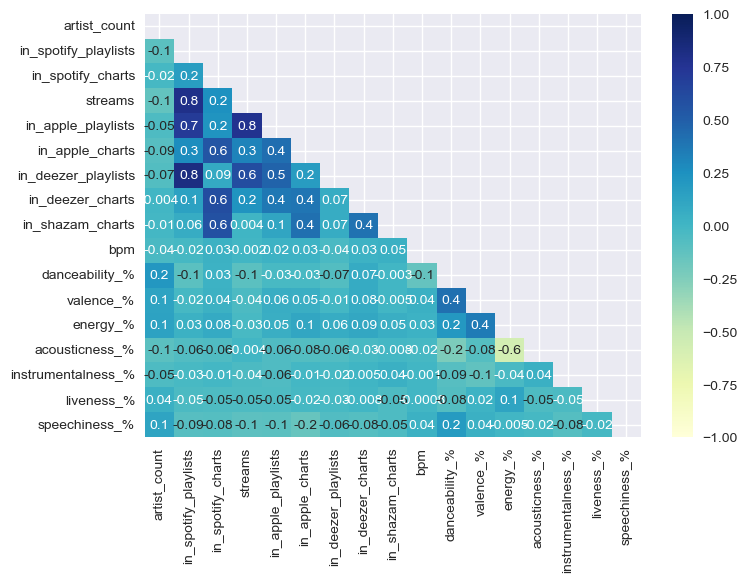

In [107]:
#Looking at correlation between variables

# creating mask to hide redundant information
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
  
# plotting correlation heatmap 
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt='.1g', mask=mask, vmin = -1, vmax = 1)

plt.show();


In [108]:
print(df.corr(numeric_only=True)["streams"])


artist_count           -0.136463
in_spotify_playlists    0.789822
in_spotify_charts       0.245821
streams                 1.000000
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_deezer_playlists     0.598131
in_deezer_charts        0.228598
in_shazam_charts        0.004174
bpm                    -0.002438
danceability_%         -0.105457
valence_%              -0.040831
energy_%               -0.026051
acousticness_%         -0.004485
instrumentalness_%     -0.044902
liveness_%             -0.048337
speechiness_%          -0.112333
Name: streams, dtype: float64


In [109]:
print(df.corr(numeric_only=True)["in_spotify_playlists"])


artist_count           -0.102184
in_spotify_playlists    1.000000
in_spotify_charts       0.164182
streams                 0.789822
in_apple_playlists      0.708258
in_apple_charts         0.271162
in_deezer_playlists     0.826388
in_deezer_charts        0.144227
in_shazam_charts        0.064368
bpm                    -0.019739
danceability_%         -0.106885
valence_%              -0.021585
energy_%                0.033899
acousticness_%         -0.064683
instrumentalness_%     -0.028194
liveness_%             -0.046725
speechiness_%          -0.089973
Name: in_spotify_playlists, dtype: float64


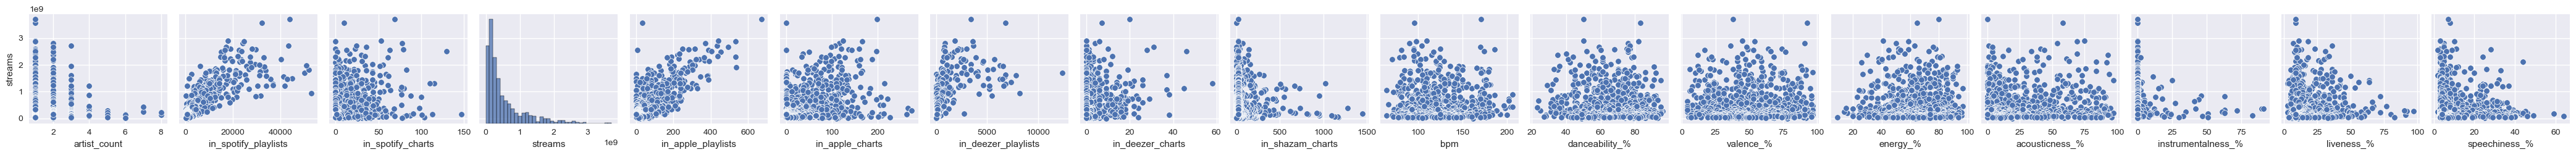

In [110]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();


## Handling outliers

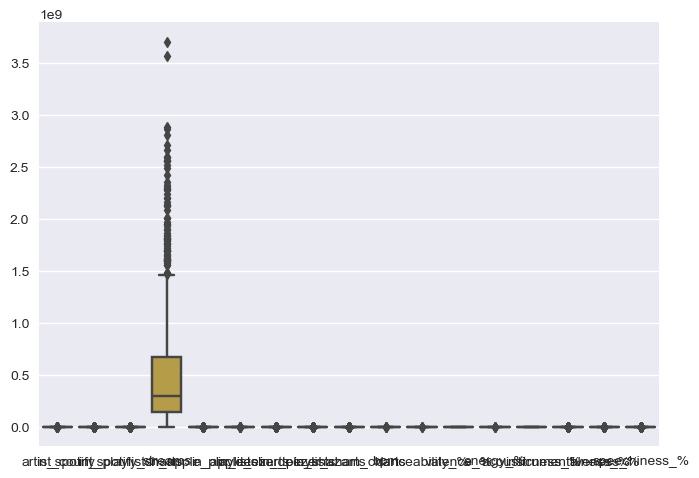

In [111]:
#We have a look to the distribution of our data to see if it is skwee (which means outliers are present)

sns.boxplot(df)
plt.show()


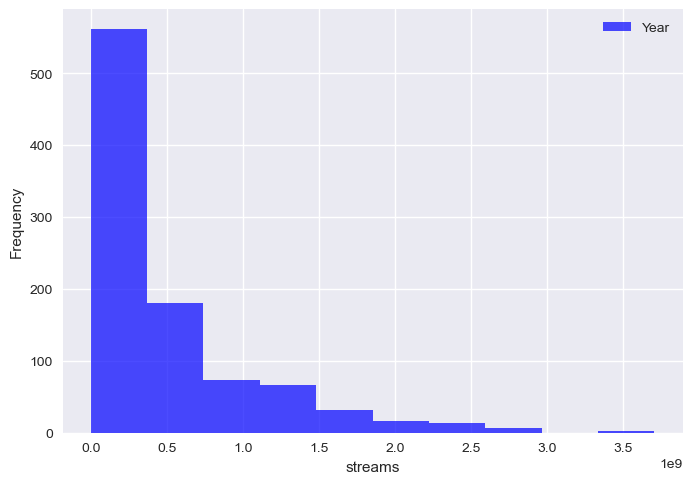

In [112]:
#Our target variable is positively (right) skweed
plt.hist(df['streams'], bins=10, color='blue', alpha=0.7, label='Year')
plt.xlabel('streams')
plt.ylabel('Frequency')
plt.legend()
plt.show();


<Axes: xlabel='streams', ylabel='Count'>

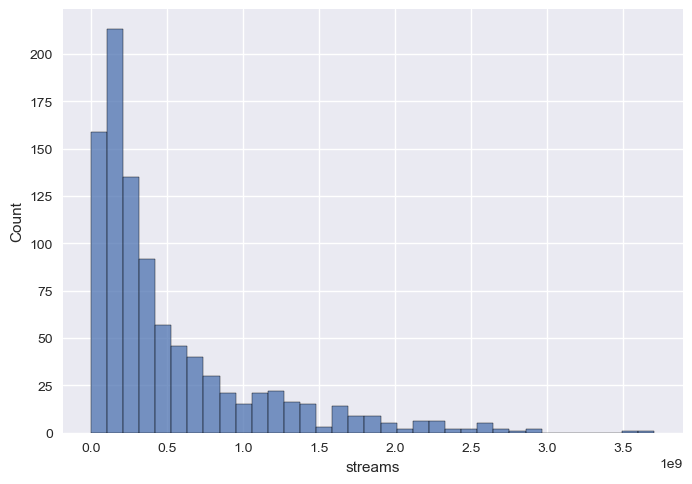

In [113]:
sns.histplot(df['streams'])


One common approach used for outlier detection is the Interquartile Range (IQR) which gives us an idea of how spread out the values in the middle of our data set are. 

This method works by sorting your dataset from the smallest to the largest values, then dividing in into four equal parts (called the quartiles). This leaves you with three points:
- **Q1 (first quartile)** - The 25th percentile. 25 percent of the data falls below this point.
- **Q2 (second quartile)** - The median. 50 percent of the data falls below and above this point.
- **Q2 (second quartile)** - The 75th percentile. 75 percent of the data falls below this point.

Using these points, you calculate the **Interquartile Range (IQR)** which is the range between the first and third quartiles

In [114]:
# Find the 75th and 25th percentiles
stream_seventy_fifth = df["streams"].quantile(0.75)
stream_twenty_fifth = df["streams"].quantile(0.25)

# Calculate iqr
streams_iqr = stream_seventy_fifth - stream_twenty_fifth

# Calculate the thresholds
upper = stream_seventy_fifth + (1.5 * streams_iqr)
lower = stream_twenty_fifth - (1.5 * streams_iqr)

# Subset the data
df1 = df[(df["streams"] > lower) & (df["streams"] < upper)]



In [115]:
df1.describe()


artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count    878.000000            878.000000         878.000000  8.780000e+02   
mean       1.578588           3709.158314          11.146925  3.864873e+08   
std        0.913648           5325.048172          18.708715  3.469503e+08   
min        1.000000             31.000000           0.000000  2.762000e+03   
25%        1.000000            824.750000           0.000000  1.344907e+08   
50%        1.000000           1940.500000           2.000000  2.599158e+08   
75%        2.000000           4437.750000          15.000000  5.366705e+08   
max        8.000000          52898.000000         147.000000  1.457139e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          878.000000       878.000000           878.000000   
mean            52.382688        49.150342           197.282460   
std             58.081386        49.295818           702.389481   
min              0.000000         0.000000             0.000000   
25%             12.000000         6.000000            12.000000   
50%             29.500000        33.500000            37.500000   
75%             73.000000        82.000000           114.000000   
max            387.000000       275.000000          8215.000000   

       in_deezer_charts  in_shazam_charts         bpm  danceability_%  \
count        878.000000        878.000000  878.000000      878.000000   
mean           2.498861         59.310021  122.677677       67.328018   
std            5.730303        162.677369   28.094193       14.607816   
min            0.000000          0.000000   65.000000       23.000000   
25%            0.000000          0.000000   99.000000       58.000000   
50%            0.000000          3.000000  121.000000       70.000000   
75%            2.000000         33.000000  140.750000       79.000000   
max           58.000000       1451.000000  206.000000       96.000000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  878.000000  878.000000      878.000000          878.000000  878.000000   
mean    51.403189   64.292711       27.037585            1.701595   18.395216   
std     23.492381   16.488888       25.759872            8.743515   13.963050   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   54.000000        6.000000            0.000000   10.000000   
50%     52.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       42.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     878.000000  
mean       10.361048  
std        10.068553  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        12.000000  
max        64.000000

<Axes: xlabel='streams', ylabel='Count'>

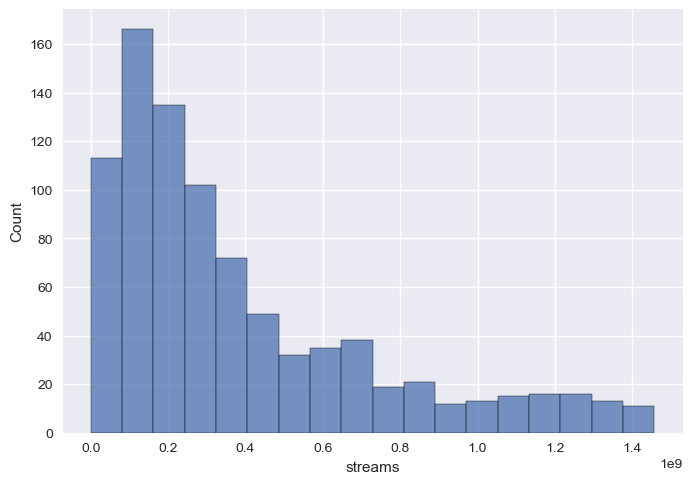

In [116]:
sns.histplot(df1['streams'])


In [117]:
#df1 is the dataset that not contains outliers in our target variable, but another option is standardizing numerical variables so extreme values do not affect our model.


# 5. Other considerations
 
## Encoding categorical variables, standarizing numerical data...

In [118]:
#Scale Numerical Data with StandardScaler()

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_z = df.copy()

scaler = StandardScaler()
num_cols = df_z.select_dtypes(include=np.number).columns

df_z[num_cols] = scaler.fit_transform(df[num_cols])

df_z.head()


artist_count  in_spotify_playlists  in_spotify_charts   streams  \
0     -0.623526              0.108574           2.093690 -0.615387   
1     -0.623526             -0.212044           4.392879 -0.223395   
2     -0.623526             -0.548237           4.699437 -0.853557   
3      0.496468             -0.577614           1.940410 -0.805004   
4      1.616462             -0.517340           3.473203 -0.792470   

   in_apple_playlists  in_apple_charts  in_deezer_playlists  in_deezer_charts  \
0            0.950341         1.897875             2.049974          3.203140   
1            0.140392         2.055971            -0.180043          3.534541   
2            0.140392         3.459071            -0.257001          3.534541   
3           -0.773694         0.000727            -0.333959         -0.442275   
4            0.163533         1.838589            -0.283538          2.208936   

   in_shazam_charts       bpm   mode  danceability_%  valence_%  energy_%  \
0          8.867235 -0.233598  Major        1.026817  -0.486041  0.104282   
1          7.785031  0.265424  Minor       -1.093045  -0.826928 -1.285462   
2          7.097513 -1.588088  Major       -1.571723  -1.593924 -3.339865   
3          7.078415  0.229779  Major       -0.272453   1.388837  1.071060   
4          6.842877  0.764446  Major        0.684904   1.005339 -0.379107   

   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0        0.458721            5.876232    0.494904      -0.316710  
1        2.151814           -0.188234   -0.672028      -0.720335  
2        2.652046           -0.188234   -0.599095      -0.720335  
3        1.651582            0.763055   -0.672028      -0.316710  
4        0.958953           -0.188234    0.349038       1.499602

In [119]:
#Encoding categorical variables. In this case, only "mode" needs this transformation

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

cat_cols = ['mode']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_z[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
df_z = df_z.drop(cat_cols ,axis=1)
df_z = pd.concat([df_encoded, df_z], axis=1)

print('Shape of dataframe:', df_z.shape)
df_z.head()



Shape of dataframe: (952, 19)


mode_Major  mode_Minor  artist_count  in_spotify_playlists  \
0         1.0         0.0     -0.623526              0.108574   
1         0.0         1.0     -0.623526             -0.212044   
2         1.0         0.0     -0.623526             -0.548237   
3         1.0         0.0      0.496468             -0.577614   
4         1.0         0.0      1.616462             -0.517340   

   in_spotify_charts   streams  in_apple_playlists  in_apple_charts  \
0           2.093690 -0.615387            0.950341         1.897875   
1           4.392879 -0.223395            0.140392         2.055971   
2           4.699437 -0.853557            0.140392         3.459071   
3           1.940410 -0.805004           -0.773694         0.000727   
4           3.473203 -0.792470            0.163533         1.838589   

   in_deezer_playlists  in_deezer_charts  in_shazam_charts       bpm  \
0             2.049974          3.203140          8.867235 -0.233598   
1            -0.180043          3.534541          7.785031  0.265424   
2            -0.257001          3.534541          7.097513 -1.588088   
3            -0.333959         -0.442275          7.078415  0.229779   
4            -0.283538          2.208936          6.842877  0.764446   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0        1.026817  -0.486041  0.104282        0.458721            5.876232   
1       -1.093045  -0.826928 -1.285462        2.151814           -0.188234   
2       -1.571723  -1.593924 -3.339865        2.652046           -0.188234   
3       -0.272453   1.388837  1.071060        1.651582            0.763055   
4        0.684904   1.005339 -0.379107        0.958953           -0.188234   

   liveness_%  speechiness_%  
0    0.494904      -0.316710  
1   -0.672028      -0.720335  
2   -0.599095      -0.720335  
3   -0.672028      -0.316710  
4    0.349038       1.499602